In [1]:
from BeeWorldGame.bee_world.run_game import BeeWorldGame

In [2]:
# initialising the game
BeeGame = BeeWorldGame()

In [3]:
# run the game with the uniform policy pi_0
BeeGame.run_game(mode='init')

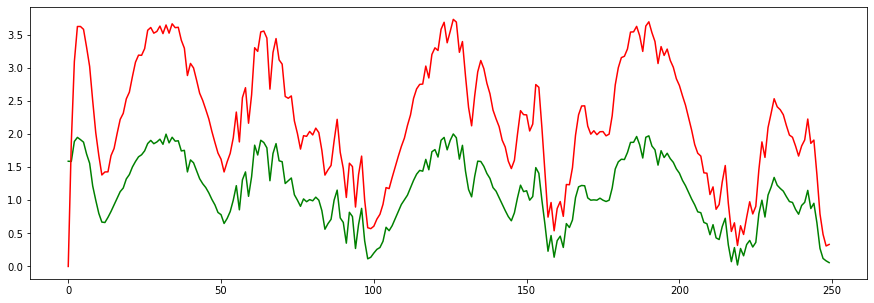

In [4]:
# plot true and estimated nectar function
BeeGame.plot_rewards()

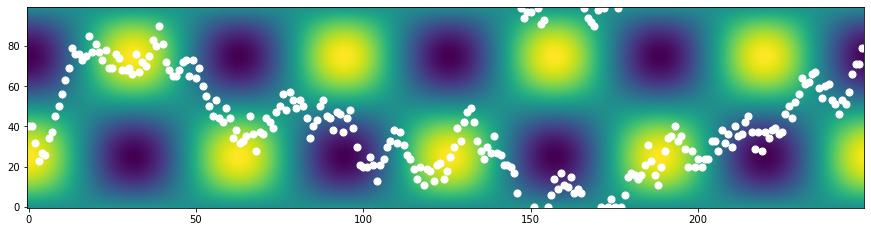

In [5]:
# plot the Bee trajectory
BeeGame.plot_game()

In [6]:
print(f'Average nectar unit collected by the Bee \n per '
      f'time unit under the strategy pi_0: {BeeGame.z[:,0].mean()}')

Average nectar unit collected by the Bee 
 per time unit under the strategy pi_0: 1.0304855627550695


In [7]:
# estimate the imporoved policy pi_1 and run the game
BeeGame.run_game(mode='train')

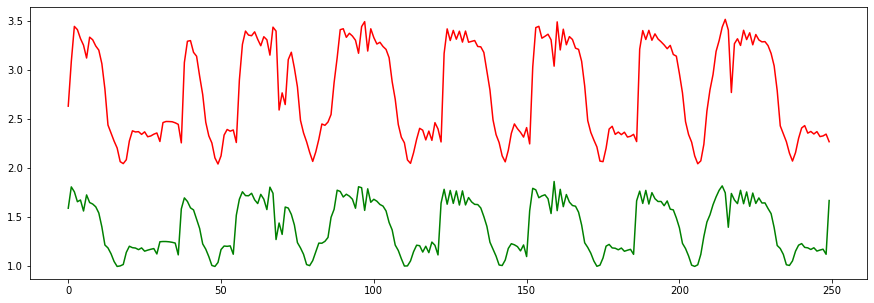

In [8]:
# plot true and estimated nectar function
BeeGame.plot_rewards()

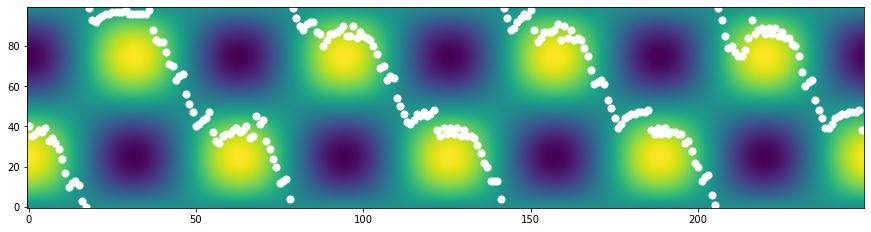

In [9]:
# plot the Bee trajectory
BeeGame.plot_game()

In [10]:
print(f'Average nectar unit collected by the Bee \n per '
      f'time unit under the improved strategy pi_1: {BeeGame.z[:,0].mean()}')

Average nectar unit collected by the Bee 
 per time unit under the improved strategy pi_1: 1.2992322415757493
